## Group 1

#### C00246500  Arnab Roy
#### C00233605 	Anjuman Ara Kali.
#### C00255172 	Alan O' Reilly
#### C00265987 	Elaine Koyce

# Alan O' Reilly - Insurance for Data Scientists CA

This jupyter notebook represents my work on our team assignment for the Insurance for Data Scientists module.

# EDA and Machine Learning - Car Insurance Claim Data 

This is an instructional tutorial in which I use Car Insurance Claim Dataset from Kaggle to generate some insights about car insurance claims and see what factors will make customers more likely to be 'repeat offenders'. This notebook will be designed in such a manner that a new user to data science in the realm of insurance, can get a step by step guide through the data science life cycle. First, I clean the data and create some new features using pandas. Then I create visualizations of said data using matplotlib and seaborn. Finally, I apply machine learning models (sklearn) to predict which customers will make repeat insurance claims while having open complaints on their account. Tasks include:

### Data Preprocessing:

    - Create target variable 'Repeat Offender' and 'Repeat&Open' 


### Exploratory Data Analysis:

    - Create visualizations to determine what attributes lead to repeat insurance claims
    - Make use of matplotlib and seaborn to create graphs that are easy to understand
    - Separate numerical variables into categorical data for plotting
    - Use visualizations to determine whether or not a variable is suitable for our ML model

### Machine Learning Models:

    - Create target variable and feature dataframe
    - Convert categorical data types to numeric
    - Split dataset into training and test data
    - Run different categorical machine learning models:
        - Gaussian Naive Bayes
        - Logistic Regression
        - Support Vector Machines
        - Decision Tree
        - Random Forest
        - k-Nearest Neighbors
        - Gradient Boosting Classifier
    - Measure accuracy of each model using sklearn.metrics.accuracy_score



# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")
# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data Preprocessing

In [2]:
df = pd.read_csv('Auto_Insurance_Claims.csv')
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,02/03/2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')



Since every customer in this dataset has made a claim, it'll be hard to draw conclusions from the data as is. Instead, I'm going to use the information in the Months Since Last Claim column to create a target variable: if a customer has had 1 or more claims in the past 12 months, we'll call them a "repeat offender". Then we can use the rest of the data to see which customer attributes lead to them becoming repeat offenders.


In [4]:
df["Months Since Last Claim"].value_counts()

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
27    182
30    182
33    179
34    169
35    142
32    138
Name: Months Since Last Claim, dtype: int64

Here I create the new 'repeat offender' column. The lambda expression can be explained as meaing : 1 if the customer had 1 or more claims in the last 12 months, 0 if not.

In [5]:
df['Repeat Offender'] = df["Months Since Last Claim"].apply(lambda x: 0 if x >= 12 else 1)

In [6]:
df.head(1)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Repeat Offender
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0


In [7]:
df["Repeat Offender"].value_counts()

0    5288
1    3846
Name: Repeat Offender, dtype: int64

In [8]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [9]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Repeat Offender                  0
dtype: int64

In [10]:
df.mean()

Claim Amount                       800.494047
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
Repeat Offender                      0.421064
dtype: float64

# Exploratory Data Analysis

Our target variable of interest: whether or not customers have made repeat claims. This variable is recorded in the form of a 0 if they have made 1 claim in the past 12 months, and a 1 if they have made more than 1 claim in the past 12 months. Since the record itself is a claim, anything over 0 in the last 12 months can be called a repeat claim.


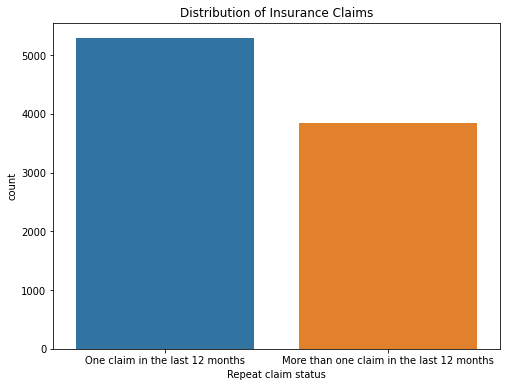

In [11]:
figure(figsize=(8,6))
sns.countplot(x='Repeat Offender',data=df)
plt.xlabel('Repeat claim status')
plt.xticks([0,1],labels=['One claim in the last 12 months','More than one claim in the last 12 months'])
plt.title('Distribution of Insurance Claims')
plt.show()

In terms of the last 12 months, more customers in this database are first-time offenders than repeat offenders by about 1300 claims.


## Gender

Does gender have any influence on our target variable?

How many Male drivers made repeat claims?
41.64%
How many Female drivers made repeat claims?
42.55%


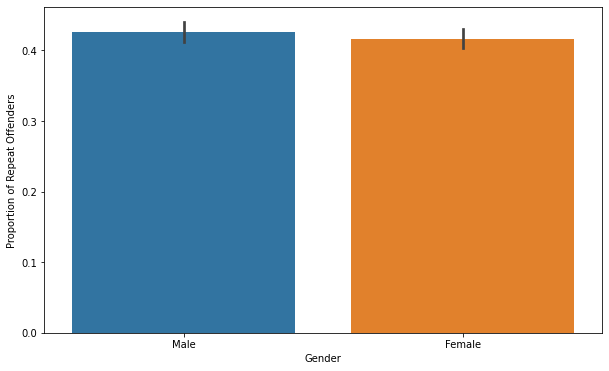

In [12]:
print("How many Male drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Gender"] == 'M'].value_counts(normalize = True)[1]))

print("How many Female drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Gender"] == 'F'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(df.Gender, df["Repeat Offender"])
plt.xlabel('Gender')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Interestingly, gender seems to have almost zero effect on whether or not a customer will make more than one claim in the chosen time frame. 


## Location

If a customer lives in the city, are they more likely to be a repeat offender?

How many Urban drivers made repeat claims?
44.82%
How many Rural drivers made repeat claims?
40.89%
How many Suburban drivers made repeat claims?
41.74%


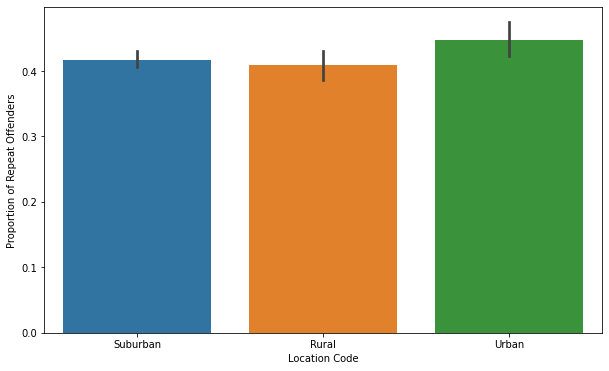

In [13]:
print("How many Urban drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Location Code"] == 'Urban'].value_counts(normalize = True)[1]))

print("How many Rural drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Location Code"] == 'Rural'].value_counts(normalize = True)[1]))

print("How many Suburban drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Location Code"] == 'Suburban'].value_counts(normalize = True)[1]))

figure(figsize=(10,6))
sns.barplot(x='Location Code',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Again, while urban areas lead to more repeat claims, it does not appear to be statstically significant.

## Education

Does ones education lead to more repeat insurance claims?

How many Bachelor degree holders made repeat claims?
41.89%
How many policy holders with some College made repeat claims?
40.95%
How many Masters degree holders made repeat claims?
42.24%
How many High School or Below drivers made repeat claims?
43.29%
How many PhD holders made repeat claims?
43.57%


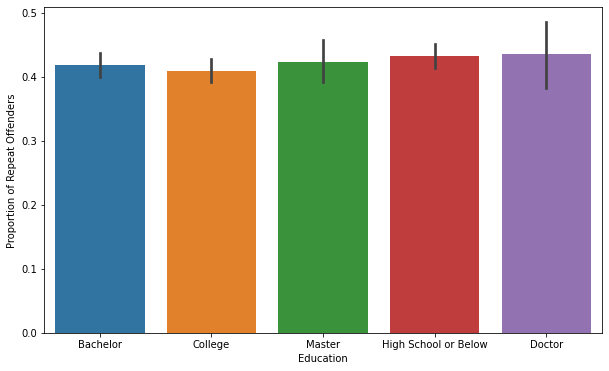

In [14]:
print("How many Bachelor degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'Bachelor'].value_counts(normalize = True)[1]))

print("How many policy holders with some College made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'College'].value_counts(normalize = True)[1]))

print("How many Masters degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'Master'].value_counts(normalize = True)[1]))

print("How many High School or Below drivers made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == 'High School or Below'].value_counts(normalize = True)[1]))

print("How many PhD holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Education"] == "Doctor"].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Education',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Again there is nothing significant being observed here.

## EmploymentStatus

Does the employment status of the polic holder effect repeat claims?

How many Disabled Policy holders made repeat claims?
44.69%
How many Employed policy holders made repeat claims?
42.68%
How many policy holders on medical leave have made repeat claims?
38.43%
How many Retired policy holders have made repeat claims?
41.84%
How many Unemployed policy holders made repeat claims?
40.96%


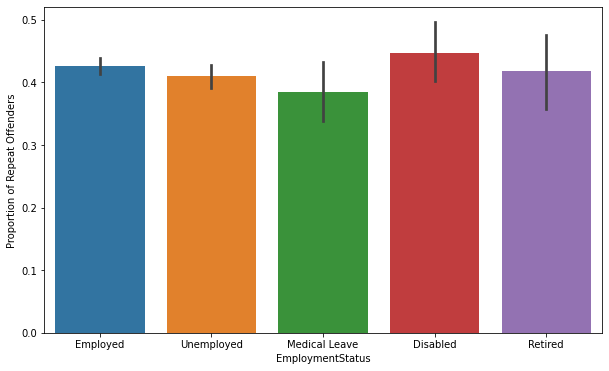

In [15]:
print("How many Disabled Policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Disabled'].value_counts(normalize = True)[1]))

print("How many Employed policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Employed'].value_counts(normalize = True)[1]))

print("How many policy holders on medical leave have made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Medical Leave'].value_counts(normalize = True)[1]))

print("How many Retired policy holders have made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == 'Retired'].value_counts(normalize = True)[1]))

print("How many Unemployed policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["EmploymentStatus"] == "Unemployed"].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='EmploymentStatus',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

While almost 45% of all disabled policy holders have made more than one claim in the past 12 months it is not that big an increase on the other measurements. It may be interesting to compare those in fulltime employment versus those who are currently not.

## Martial Status

How many Married policy holders made repeat claims?
42.28%
How many Single policy holders made repeat claims?
41.26%
How many Divorced policy holders made repeat claims?
42.95%


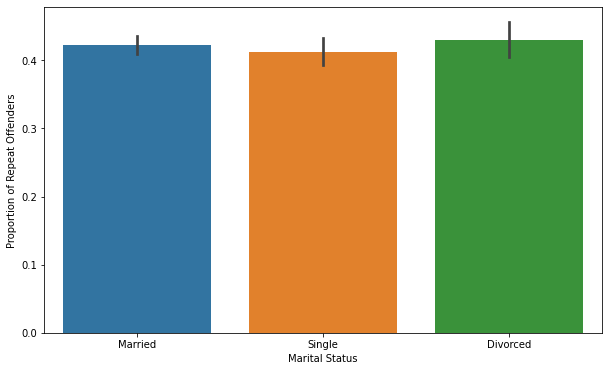

In [16]:
print("How many Married policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Marital Status"] == 'Married'].value_counts(normalize = True)[1]))

print("How many Single policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Marital Status"] == 'Single'].value_counts(normalize = True)[1]))

print("How many Divorced policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Marital Status"] == 'Divorced'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Marital Status',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

The arital status of the policy holder does not seem to effect the the frequency of claims in the last 12 months.

## Vehicle Class

How many Two-Door Car policy holders made repeat claims?
41.68%
How many Four-Door Car policy holders made repeat claims?
41.10%
How many SUV Car policy holders made repeat claims?
44.54%
How many Luxury SUV policy holders made repeat claims?
44.57%
How many Sports Car policy holders made repeat claims?
44.01%
How many Luxury Car policy degree holders made repeat claims?
40.49%


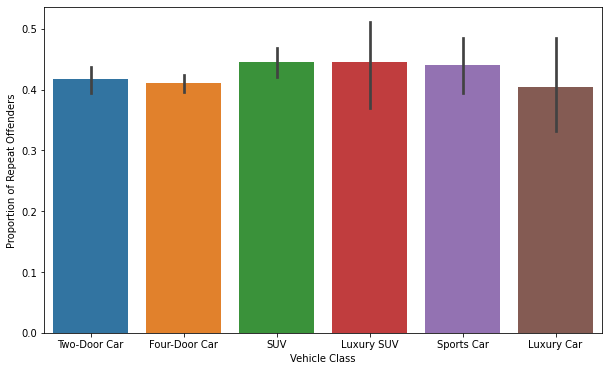

In [17]:
print("How many Two-Door Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Two-Door Car'].value_counts(normalize = True)[1]))

print("How many Four-Door Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Four-Door Car'].value_counts(normalize = True)[1]))

print("How many SUV Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'SUV'].value_counts(normalize = True)[1]))

print("How many Luxury SUV policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Luxury SUV'].value_counts(normalize = True)[1]))

print("How many Sports Car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Sports Car'].value_counts(normalize = True)[1]))

print("How many Luxury Car policy degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Class"] == 'Luxury Car'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Class',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()



It appears that the class of car has no bearing on the frequency of claims in the last 12 months

## Vehicle Size

How many Medsize car policy holders made repeat claims?
41.63%
How many Small car policy holders made repeat claims?
42.97%
How many Large car policy degree holders made repeat claims?
43.76%


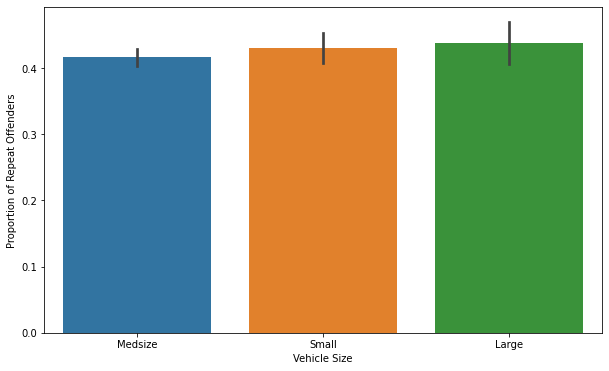

In [18]:
print("How many Medsize car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Size"] == 'Medsize'].value_counts(normalize = True)[1]))

print("How many Small car policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Size"] == 'Small'].value_counts(normalize = True)[1]))

print("How many Large car policy degree holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Vehicle Size"] == 'Large'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Size',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Vehicle Size has no effect on the amount of claims in the last 12 months 

## State

How many Kansas policy holders made repeat claims?
38.47%
How many Nebraska policy holders made repeat claims?
42.69%
How many Oklahoma policy holders made repeat claims?
41.38%
How many Missouri policy holders made repeat claims?
42.00%
How many Iowa policy holders made repeat claims?
43.21%


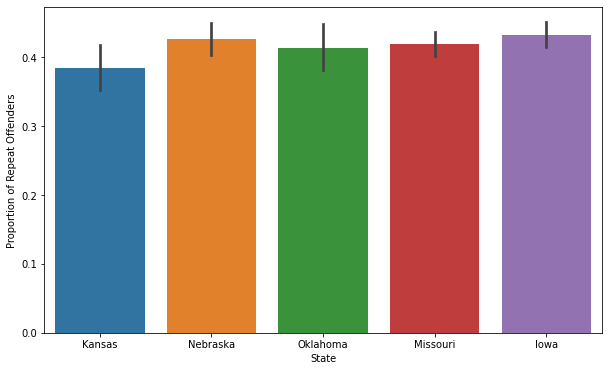

In [19]:
print("How many Kansas policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Kansas'].value_counts(normalize = True)[1]))

print("How many Nebraska policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Nebraska'].value_counts(normalize = True)[1]))

print("How many Oklahoma policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Oklahoma'].value_counts(normalize = True)[1]))

print("How many Missouri policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Missouri'].value_counts(normalize = True)[1]))

print("How many Iowa policy holders made repeat claims?")
print("{:.2%}".format(df["Repeat Offender"][df["State"] == 'Iowa'].value_counts(normalize = True)[1]))




figure(figsize=(10,6))
sns.barplot(x='State',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

The state the policy holder lives in seems to have no effect on the amount of claims in the last 12 months

## Income

To observe whether one income group has an increased likelihood of multiple claims compared to another, I had preform some feature engineering to sort the customers into income groups:

- 16-22
- 22-30
- 30-40
- 40-50
- 50-60
- 60+


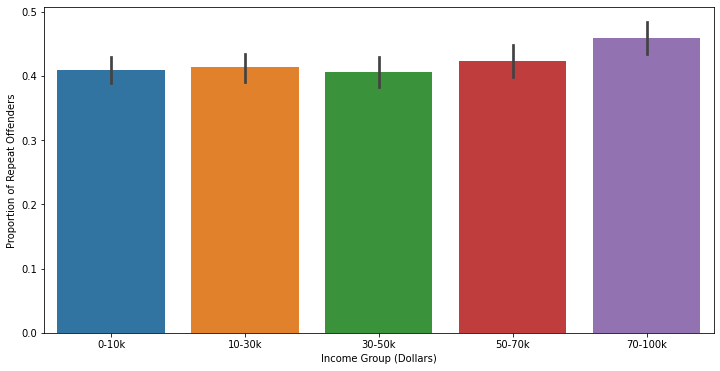

In [20]:
df["Income"] = pd.to_numeric(df["Income"], errors = 'coerce')
df['IncomeGroup'] = pd.cut(df["Income"], bins = [-np.inf, 10000, 30000, 50000, 70000, np.inf], labels = ['0-10k','10-30k', '30-50k', '50-70k', '70-100k',])
figure(figsize=(12,6))
sns.barplot(x='IncomeGroup',y="Repeat Offender", data=df)
plt.xlabel("Income Group (Dollars)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Higher income drivers seem to claim more frequently but not in a statstically significant manner

My analysis was not producing anything of significance so I decided to dig a little deeper and create another target variable. I wanted to see if the the number of open complaints a policy holder had, combined with the amount of claims made in the last 12 months could offer the insurance company some insight into their customers and in turn inform the companies premiums. 

## Open Complaints

We can see below that amount of open complaints on a policy is pretty evenly distributed

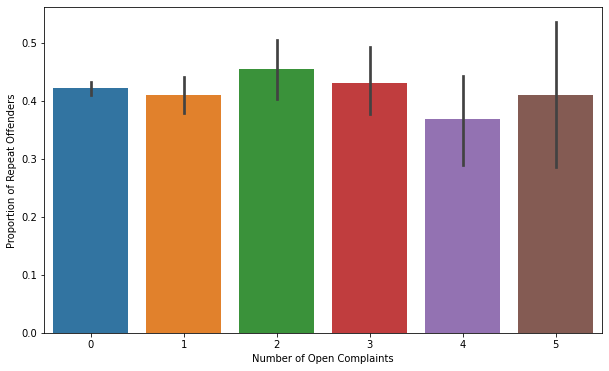

In [21]:
figure(figsize=(10,6))
sns.barplot(x='Number of Open Complaints',y="Repeat Offender", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Some feature engineering was necessary to separate policy holders into those who have no complains on there policy and those with more than 0. The I wanted to see the difference between repeat claimants who had no complaints and repeat claimants with multiple complaints.

How many drivers have no complaints on their policy?
42.15%
How many drivers have one or more complaints on their claims?
41.92%


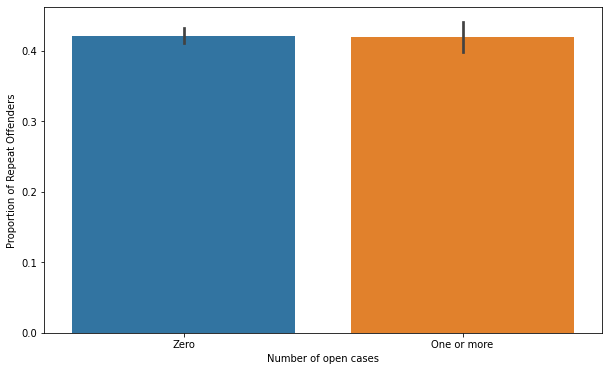

In [22]:
tempdf = df
tempdf["Open Cases?"]  = df["Number of Open Complaints"].apply(lambda x: 'Zero' if x == 0 else 'One or more')

print("How many drivers have no complaints on their policy?")
print("{:.2%}".format(df["Repeat Offender"][df["Open Cases?"] == 'Zero'].value_counts(normalize = True)[1]))

print("How many drivers have one or more complaints on their claims?")
print("{:.2%}".format(df["Repeat Offender"][df["Open Cases?"] == 'One or more'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='Open Cases?',y="Repeat Offender", data=df)
plt.xlabel('Number of open cases')
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

We can see that the two subsets are evenly distributed. 

In [23]:
df[(df["Repeat Offender"] == 1) & (df["Number of Open Complaints"] > 0)]

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Repeat Offender,IncomeGroup,Open Cases?
12,DP39365,US,MO,Missouri,879.879700,No,Premium,Master,02/06/2011,Employed,...,Corporate Auto,Corporate L1,Hail,Agent,472.029737,Four-Door Car,Medsize,1,70-100k,One or more
23,TZ98966,US,OK,Oklahoma,245.019100,No,Basic,Bachelor,2/24/11,Unemployed,...,Corporate Auto,Corporate L3,Collision,Branch,554.376763,Four-Door Car,Medsize,1,0-10k,One or more
30,SV85652,US,NE,Nebraska,245.458354,No,Basic,College,2/28/11,Employed,...,Personal Auto,Personal L2,Other,Call Center,322.294043,Four-Door Car,Small,1,10-30k,One or more
39,WC35801,US,NE,Nebraska,252.163310,No,Basic,High School or Below,02/07/2011,Employed,...,Personal Auto,Personal L3,Collision,Call Center,157.397849,Four-Door Car,Medsize,1,50-70k,One or more
40,QG25316,US,OK,Oklahoma,265.206179,No,Basic,High School or Below,1/18/11,Unemployed,...,Corporate Auto,Corporate L3,Scratch/Dent,Call Center,484.318536,Two-Door Car,Medsize,1,0-10k,One or more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,IX18485,US,MO,Missouri,959.424890,No,Extended,High School or Below,02/01/2011,Retired,...,Personal Auto,Personal L2,Collision,Agent,685.048914,Four-Door Car,Medsize,1,10-30k,One or more
9092,CO91673,US,MO,Missouri,454.732182,No,Basic,Bachelor,2/14/11,Medical Leave,...,Personal Auto,Personal L2,Hail,Agent,292.800000,Four-Door Car,Medsize,1,10-30k,One or more
9111,IJ25462,US,MO,Missouri,284.552093,No,Basic,Bachelor,02/07/2011,Employed,...,Personal Auto,Personal L2,Scratch/Dent,Agent,400.832857,Four-Door Car,Small,1,70-100k,One or more
9121,BB10681,US,MO,Missouri,414.064865,No,Extended,College,1/17/11,Unemployed,...,Corporate Auto,Corporate L3,Collision,Branch,590.400000,SUV,Medsize,1,0-10k,One or more


Further feature engineering is applied to create a new target variable that categorises policy holders into those repeat claimants who had no complaints and repeat claimants with multiple complaints

In [24]:
df['Repeat&Open'] = 0 

df.loc[(df["Repeat Offender"] == 1) & 
       (df["Number of Open Complaints"] > 0), 
       'Repeat&Open'] = 1 # then set class to 1

Below we can see only about 1000 policy holders had multiple open complaints while having also made more than one claim in the last year. It is this subset we will preform further exploratory analysis.

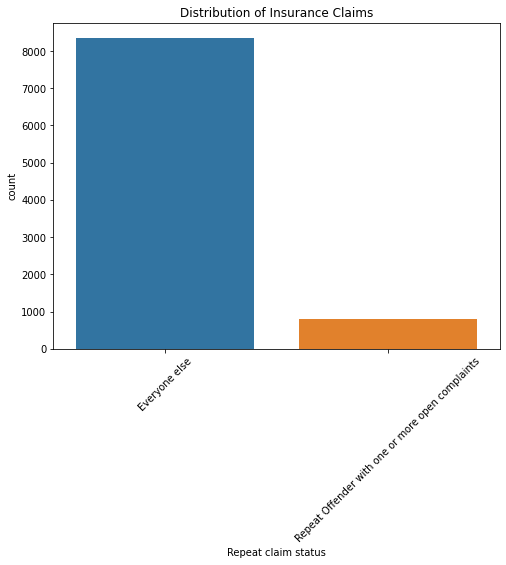

In [25]:
figure(figsize=(8,6))
sns.countplot(x='Repeat&Open',data=df)
plt.xlabel('Repeat claim status')
plt.xticks([0,1],labels=['Everyone else','Repeat Offender with one or more open complaints'])
plt.xticks(rotation=45)
plt.title('Distribution of Insurance Claims')
plt.show()

## Exploratory Analysis using new Target Variable

## Gender

How many Male drivers made repeat claims while having one or more complaints open?
8.31%
How many Male drivers made repeat claims while having one or more complaints open?
8.95%


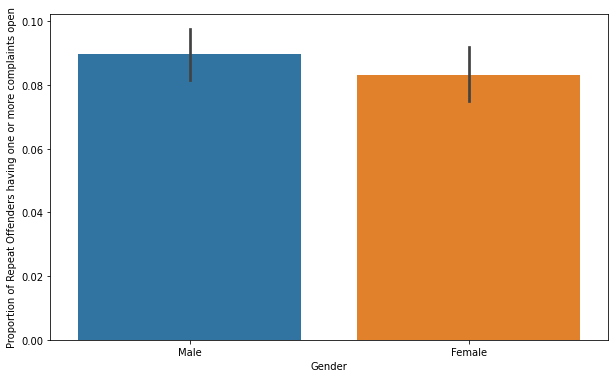

In [26]:
print("How many Male drivers made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Gender"] == 'M'].value_counts(normalize = True)[1]))

print("How many Male drivers made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Gender"] == 'F'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(df.Gender, df["Repeat&Open"])
plt.xlabel('Gender')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylabel("Proportion of Repeat Offenders having one or more complaints open")
plt.show()

## Location

How many Urban drivers made repeat claims while having one or more complaints open?
9.54%
How many Rural drivers made repeat claims while having one or more complaints open?
8.91%
How many Suburban drivers made repeat claims while having one or more complaints open?
8.31%


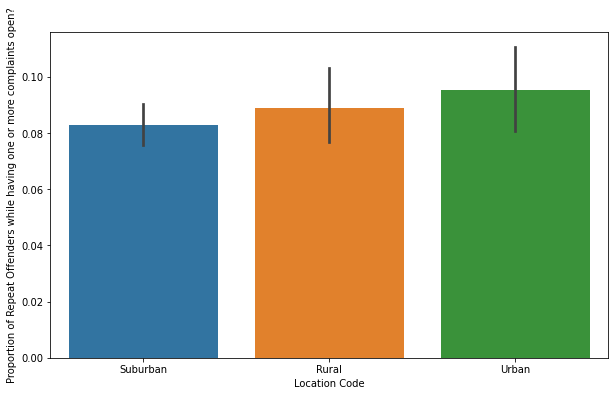

In [27]:
print("How many Urban drivers made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Location Code"] == 'Urban'].value_counts(normalize = True)[1]))

print("How many Rural drivers made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Location Code"] == 'Rural'].value_counts(normalize = True)[1]))

print("How many Suburban drivers made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Location Code"] == 'Suburban'].value_counts(normalize = True)[1]))

figure(figsize=(10,6))
sns.barplot(x='Location Code',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open?")
plt.show()

## Education

How many Bachelor degree holders made repeat claims while having one or more complaints open?
9.97%
How many policy holders with some College made repeat claims while having one or more complaints open?
8.06%
How many Masters degree holders made repeat claims while having one or more complaints open?
9.18%
How many High School or Below drivers made repeat claims while having one or more complaints open?
7.70%
How many PhD holders made repeat claims while having one or more complaints open?
8.48%


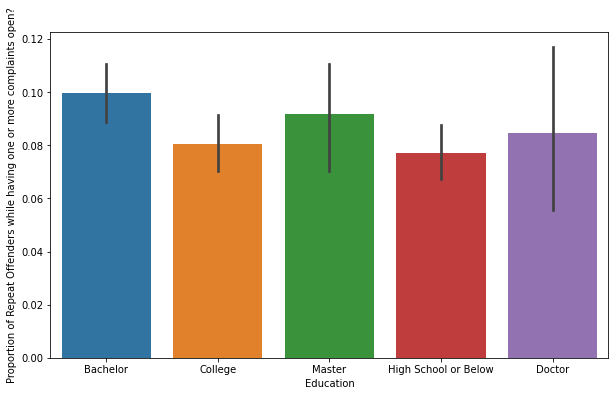

In [28]:
print("How many Bachelor degree holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'Bachelor'].value_counts(normalize = True)[1]))

print("How many policy holders with some College made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'College'].value_counts(normalize = True)[1]))

print("How many Masters degree holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'Master'].value_counts(normalize = True)[1]))

print("How many High School or Below drivers made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == 'High School or Below'].value_counts(normalize = True)[1]))

print("How many PhD holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Education"] == "Doctor"].value_counts(normalize = True)[1]))

figure(figsize=(10,6))
sns.barplot(x='Education',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open?")
plt.show()

## Employment Status

Below we can see that we seem to have our first statistically significant distribution. It seems that retirees are more likely to haven open complaints on their account while having made multiple claims in the last year.

How many Disabled Policy holders made repeat claims while having one or more complaints open?
4.69%
How many Employed policy holders made repeat claims while having one or more complaints open?
8.99%
How many policy holders on medical leave have made repeat claims while having one or more complaints open?
8.33%
How many Retired policy holders have made repeat claims while having one or more complaints open?
13.83%
How many Unemployed policy holders made repeat claims while having one or more complaints open?
7.90%


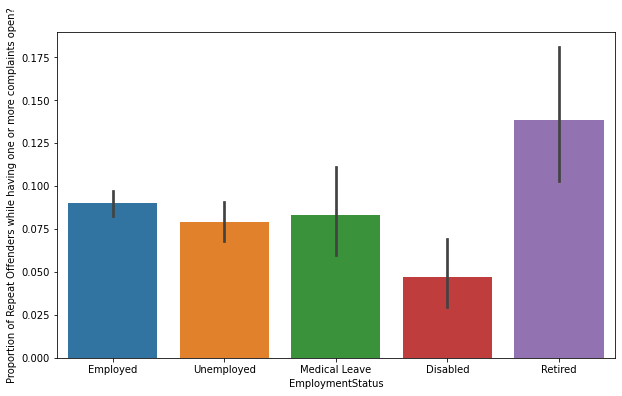

In [29]:
print("How many Disabled Policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Disabled'].value_counts(normalize = True)[1]))

print("How many Employed policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Employed'].value_counts(normalize = True)[1]))

print("How many policy holders on medical leave have made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Medical Leave'].value_counts(normalize = True)[1]))

print("How many Retired policy holders have made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == 'Retired'].value_counts(normalize = True)[1]))

print("How many Unemployed policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["EmploymentStatus"] == "Unemployed"].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='EmploymentStatus',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open?")
plt.show()

## Vehicle Class

For the vehicle class we can see that both of the luxury types of vehicles seem to be over represented among those with multiple claims and multiple open complaints. 

How many Two-Door Car policy holders with repeat claims while having one or more complaints open?
7.95%
How many Four-Door Car policy holders with repeat claims while having one or more complaints open?
9.00%
How many SUV Car policy holders made repeat claims while having one or more complaints open?
8.07%
How many Luxury SUV policy holders made repeat claims while having one or more complaints open?
14.13%
How many Sports Car policy holders made repeat claims while having one or more complaints open?
6.82%
How many Luxury Car policy degree holders made repeat claims while having one or more complaints open?
11.66%


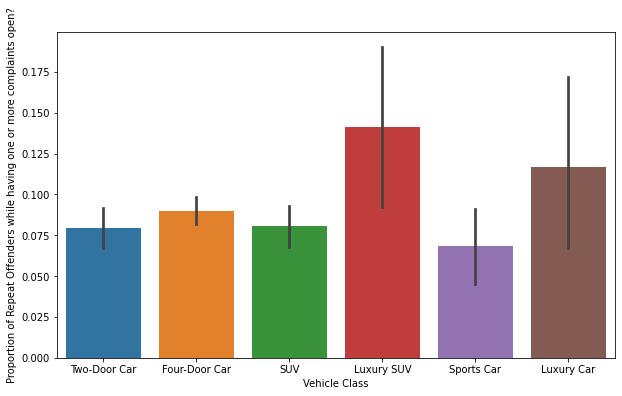

In [30]:
print("How many Two-Door Car policy holders with repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Two-Door Car'].value_counts(normalize = True)[1]))

print("How many Four-Door Car policy holders with repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Four-Door Car'].value_counts(normalize = True)[1]))

print("How many SUV Car policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'SUV'].value_counts(normalize = True)[1]))

print("How many Luxury SUV policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Luxury SUV'].value_counts(normalize = True)[1]))

print("How many Sports Car policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Sports Car'].value_counts(normalize = True)[1]))

print("How many Luxury Car policy degree holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Class"] == 'Luxury Car'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Class',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open?")
plt.show()

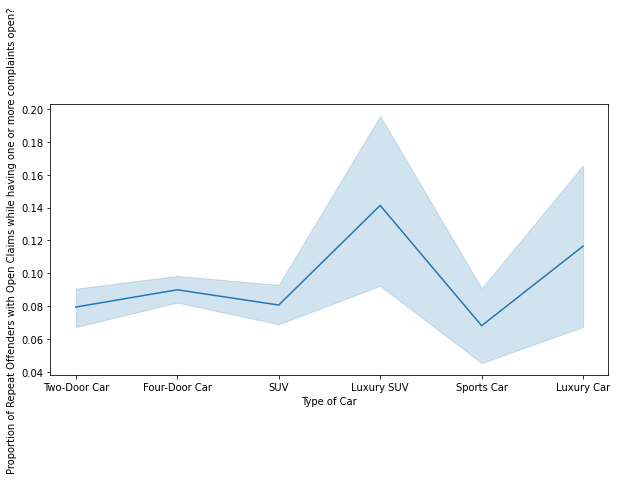

In [31]:
figure(figsize=(10,5))
sns.lineplot(x="Vehicle Class",y="Repeat&Open",data=df)
plt.xlabel("Type of Car")
plt.ylabel("Proportion of Repeat Offenders with Open Claims while having one or more complaints open?")
plt.show()

## Marital Status

How many Married policy holders made repeat claims while having one or more complaints open? ?
8.68%
How many Singe policy holders made repeat claims while having one or more complaints open??
8.15%
How many Divorced degree holders made repeat claims while having one or more complaints open??
9.35%


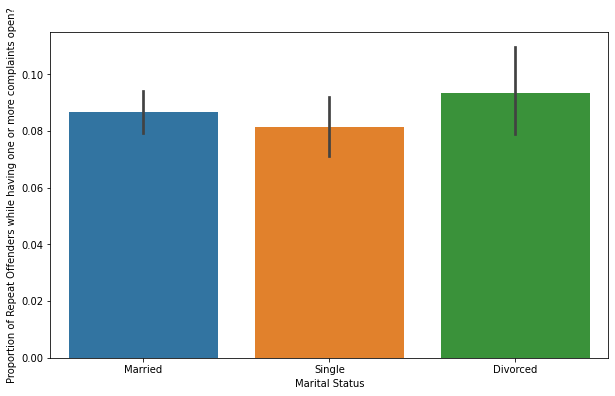

In [32]:
print("How many Married policy holders made repeat claims while having one or more complaints open? ?")
print("{:.2%}".format(df["Repeat&Open"][df["Marital Status"] == 'Married'].value_counts(normalize = True)[1]))

print("How many Singe policy holders made repeat claims while having one or more complaints open??")
print("{:.2%}".format(df["Repeat&Open"][df["Marital Status"] == 'Single'].value_counts(normalize = True)[1]))

print("How many Divorced degree holders made repeat claims while having one or more complaints open??")
print("{:.2%}".format(df["Repeat&Open"][df["Marital Status"] == 'Divorced'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Marital Status',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open?")
plt.show()

## Vehicle Size

How many Medsize car policy holders made repeat claims while having one or more complaints open?
8.76%
How many Small car policy holders made repeat claims while having one or more complaints open?
7.88%
How many Large car policy  made repeat claims while having one or more complaints open?
9.20%


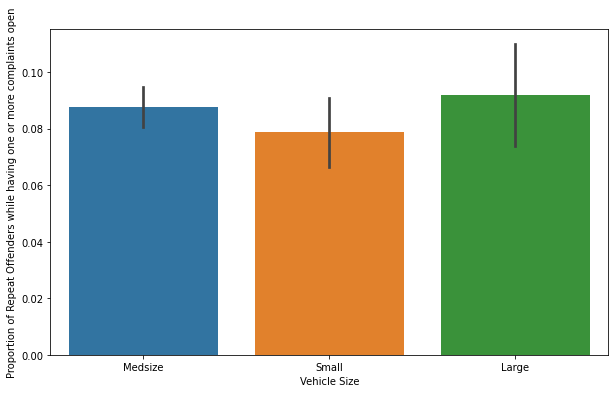

In [33]:
print("How many Medsize car policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Size"] == 'Medsize'].value_counts(normalize = True)[1]))

print("How many Small car policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Size"] == 'Small'].value_counts(normalize = True)[1]))

print("How many Large car policy  made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["Vehicle Size"] == 'Large'].value_counts(normalize = True)[1]))


figure(figsize=(10,6))
sns.barplot(x='Vehicle Size',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open")
plt.show()

## State

How many Kansas policy holders made repeat claims while having one or more complaints open?
8.15%
How many Nebraska policy holders made repeat claims while having one or more complaints open?
7.99%
How many Oklahoma policy holders made repeat claims while having one or more complaints open?
8.84%
How many Missouri policy holders made repeat claims while having one or more complaints open?
9.43%
How many Iowa policy holders made repeat claims while having one or more complaints open?
8.19%


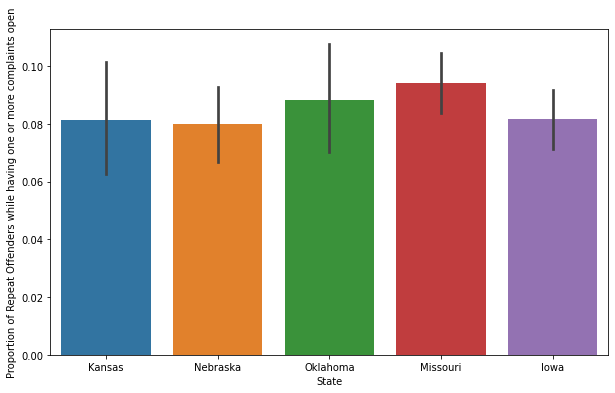

In [34]:
print("How many Kansas policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Kansas'].value_counts(normalize = True)[1]))

print("How many Nebraska policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Nebraska'].value_counts(normalize = True)[1]))

print("How many Oklahoma policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Oklahoma'].value_counts(normalize = True)[1]))

print("How many Missouri policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Missouri'].value_counts(normalize = True)[1]))

print("How many Iowa policy holders made repeat claims while having one or more complaints open?")
print("{:.2%}".format(df["Repeat&Open"][df["State"] == 'Iowa'].value_counts(normalize = True)[1]))




figure(figsize=(10,6))
sns.barplot(x='State',y="Repeat&Open", data=df)
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open")
plt.show()

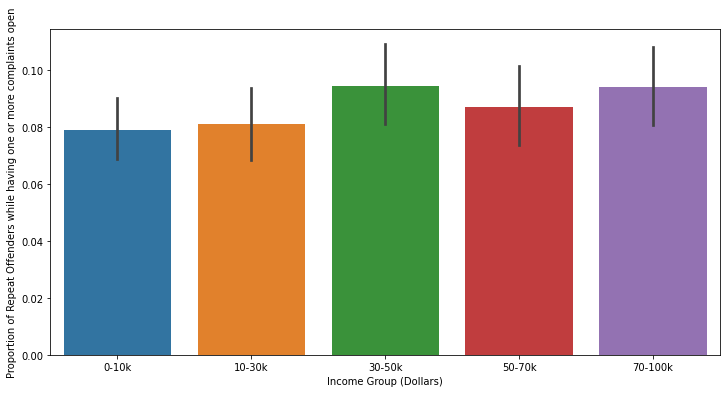

In [35]:
figure(figsize=(12,6))
sns.barplot(x='IncomeGroup',y="Repeat&Open", data=df)
plt.xlabel("Income Group (Dollars)")
plt.ylabel("Proportion of Repeat Offenders while having one or more complaints open")
plt.show()

## Machine Learning Models

The features which have had the most effect on the likelihood of repeat insurance claims while also having one or more open complaints were discovered above. Those are:

 - Vehicle Class
 - Employment Status


Our prediction target is the variable Repeat&Open.

In [36]:
y = df["Repeat&Open"]

Here I reduce employment status and vehicle class into categorical variable. Employment status will be 1 for Retired and 0 for anything else. Since both luxury models of cars where over represented they have both been classed as luxury cars and thus assigned 1, where as all other types of vehicle class become 1.

In [37]:
df["EmploymentStatus"] = df.EmploymentStatus.apply(lambda x: 1 if x == 'Retired' else 0)
df['Vehicle Class'] = df['Vehicle Class'].apply(lambda x: 1 if x == 'Luxury Car' or x == 'Luxury SUV'  else 0)

Our chosen features are below

In [38]:
features = ['Vehicle Class', 'EmploymentStatus']

In [39]:
X = df[features]

In [40]:
X

,Vehicle Class,EmploymentStatus
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9129,0,0
9130,0,0
9131,0,0
9132,0,0


In [41]:
X.describe()

,Vehicle Class,EmploymentStatus
count,9134.000000,9134.000000
mean,0.037990,0.030874
std,0.191182,0.172985
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000




Next we have to split our dataset into training data and test data and then test the accuracy of different machine learning algorithms. We'll take 35% of our data as test data. For each ML model, we'll use sklearn.metrics accuracy score to test the accuracy and print that out to see which one works the best.


In [42]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [43]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)



87.52


In [44]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

91.96


In [45]:
# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)



91.96


In [46]:
#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

91.96


In [47]:
# Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)



91.96


In [48]:
# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

91.96


In [49]:
# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

91.96


Of All our machine learning models the lowest was 87.52, with all others scoring 90 or above. This would suggest that there is a strong connection between retirees and luxury car holders and the propensity to make repeat claims on an insurance policy while also having multiple open complaints. 

# Conclusion

We hope this tutorial helped in outlining some of the approaches to tackling data science projects within the realm of the Insurance Industry. We felt it was this specific example showed how it is always best to follow the data rather than our preconceptions, for example for many it is assumed that Male drivers and younger drivers tend to be involved in more accidents and in turn claim more on their insurance. From our analysis above this appears to not be the case. Correctly setting the premium on policy holders is important to having a viable business, and by correctly identifying behaviours of your clientele using data analysis and machine learning is vital to achieve this goal. 


Sources used:

Dataset from: https://www.kaggle.com/xiaomengsun/car-insurance-claim-data

Other sources:

    - http://rstudio-pubs-static.s3.amazonaws.com/325100_1db19d9fa2e8482c98af89a1d5d91802.html
    - https://www.kaggle.com/nadintamer/titanic-survival-predictions
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - https://www.kaggle.com/dansbecker/model-validation
    - https://scikit-learn.org/stable/auto_examples/index.html#classification
    - https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

